In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
x,y = make_moons(100, noise=0.25, random_state=2)

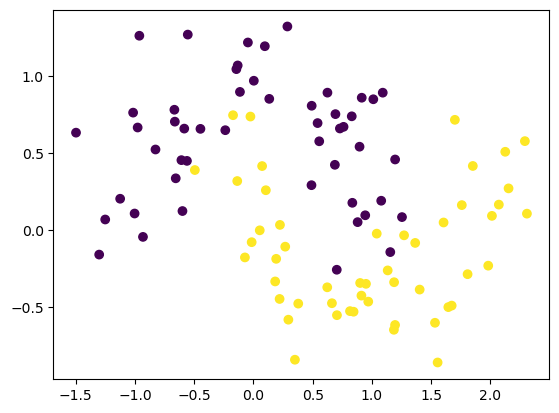

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [8]:
model1 = Sequential()

model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [9]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [11]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(x, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 [==============================] - 1s 109ms/step - loss: 0.5804 - accuracy: 0.7250 - val_loss: 0.3300 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.4116 - accuracy: 0.8500 - val_loss: 0.1917 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.4639 - accuracy: 0.7750 - val_loss: 0.1853 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.3747 - accuracy: 0.8375 - val_loss: 0.3076 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.3984 - accuracy: 0.8375 - val_loss: 0.3107 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.3852 - accuracy: 0.8500 - val_loss: 0.2455 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 14ms/step - loss: 0.3578 - accuracy: 0.8500 - val_loss: 0.2086 - val_accuracy: 0.9000
Epoch 8/2000

9600/9600 [==============================] - 8s 817us/step


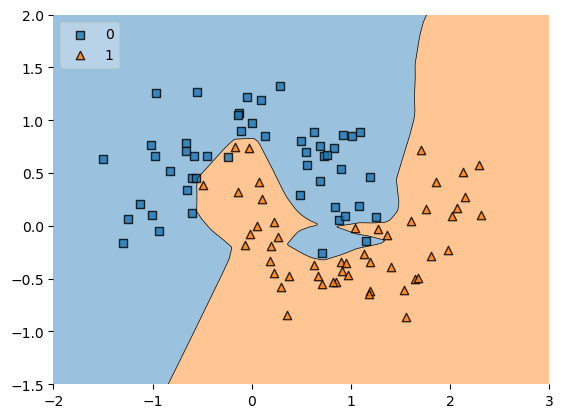

In [13]:
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

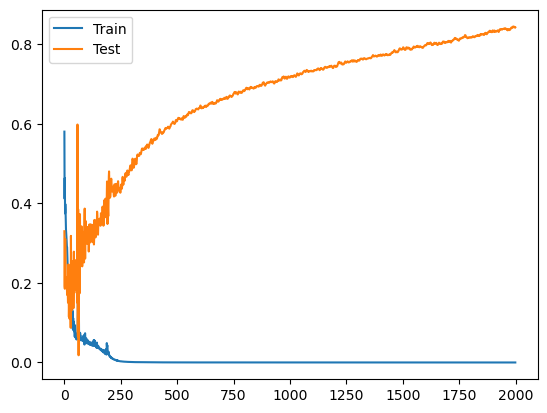

In [15]:
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [16]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [18]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(x, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 [==============================] - 1s 92ms/step - loss: 1.8023 - accuracy: 0.5875 - val_loss: 1.3821 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 15ms/step - loss: 1.3417 - accuracy: 0.7875 - val_loss: 0.9812 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 14ms/step - loss: 1.0450 - accuracy: 0.8500 - val_loss: 0.8040 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.8674 - accuracy: 0.8375 - val_loss: 0.6812 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 14ms/step - loss: 0.7465 - accuracy: 0.8375 - val_loss: 0.6145 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 14ms/step - loss: 0.7019 - accuracy: 0.8500 - val_loss: 0.5886 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 14ms/step - loss: 0.6643 - accuracy: 0.8500 - val_loss: 0.5469 - val_accuracy: 0.9000
Epoch 8/2000


9600/9600 [==============================] - 8s 790us/step


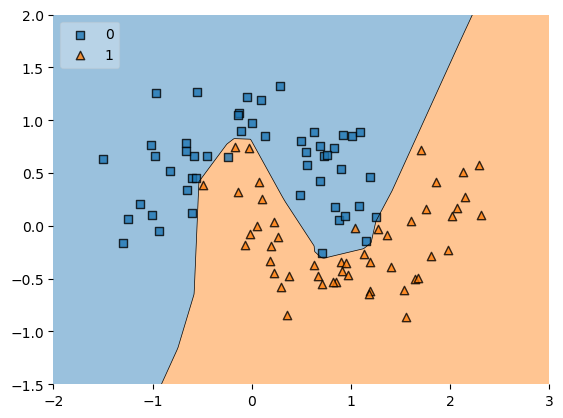

In [19]:
plot_decision_regions(x, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

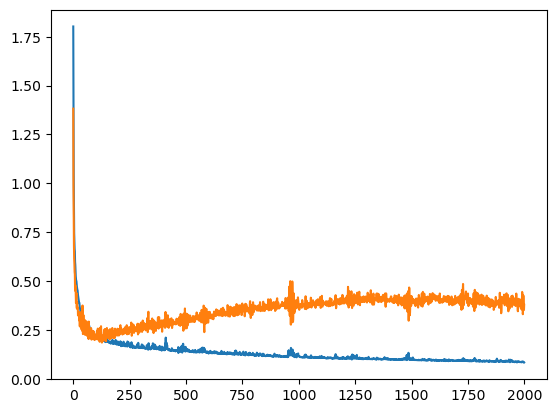

In [20]:
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Test')

In [21]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

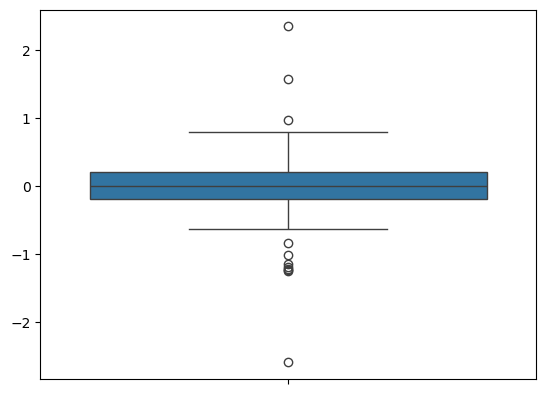

In [22]:
sns.boxplot(model1_weight_layer1)

<Axes: >

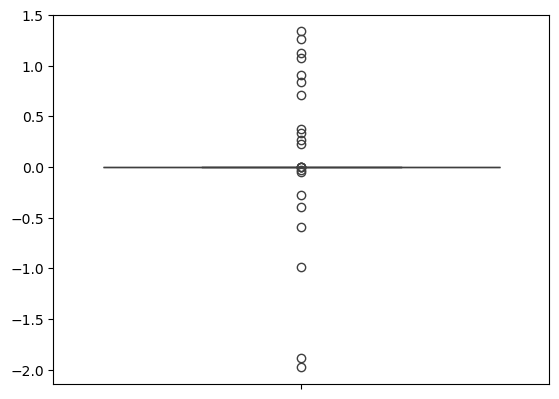

In [23]:
sns.boxplot(model2_weight_layer1)

In [24]:
model1_weight_layer1.min()

-2.5905623

In [25]:
model2_weight_layer1.min()

-1.9770021

C:\Users\Atharva\AppData\Local\Temp\ipykernel_15212\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Atharva\AppData\Local\Temp\ipykernel_15212\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

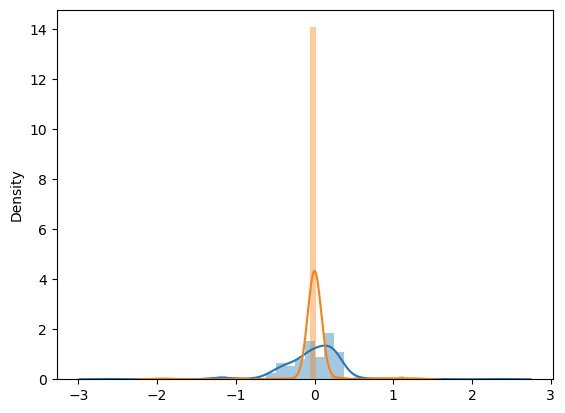

In [26]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [27]:
model1.get_weights()[0].reshape(256)

array([-3.15952659e-01,  3.27811301e-01, -3.70668054e-01, -1.11472094e-02,
        1.37833089e-01, -4.24704820e-01,  2.15431377e-01,  1.51413446e-02,
       -2.03315243e-02,  2.31141284e-01, -1.00335060e-02, -2.99175560e-01,
       -1.43924296e-01, -1.94835767e-01, -4.06283855e-01, -2.55486846e-01,
        1.85869038e-01, -3.14184189e-01,  1.91936031e-01, -3.74638021e-01,
        2.81132549e-01, -4.79187399e-01,  3.04792494e-01,  1.35031700e-01,
        5.74093014e-02, -4.26087022e-01, -1.20975293e-01,  2.23266557e-01,
        1.86200827e-01, -2.52899647e-01,  2.24072456e-01,  2.78475016e-01,
       -5.26230969e-03, -3.94574732e-01, -3.67524713e-01,  2.04769716e-01,
       -3.51295412e-01, -3.39504153e-01,  2.35813171e-01, -7.89216254e-03,
       -3.91790569e-01, -4.53273714e-01,  3.03691119e-01, -1.43024608e-01,
        2.70002663e-01, -1.45161465e-01, -4.69050407e-02,  5.73264360e-02,
       -3.94180894e-01, -2.68292483e-02,  1.89891607e-01, -2.03064039e-01,
       -5.16577251e-02,  